# Data Info

- The output we wish to predict is in "y":
	y: miles per gallon

- Each row in "X" contains seven numbers. These numbers are scaled and should be used for your experiments. The original numbers are in "X_orig". The 7 columns of "X" correspond to:
	x1: intercept term
	x2: number of cylinders
	x3: displacement
	x4: horsepower
	x5: weight
	x6: acceleration
	x7: model year

- "legend" contains car name for each entry of y and row of X


# Modules to import

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
from scipy.stats import norm

# Part 1

## read data

In [3]:
X = np.loadtxt('data_csv/X.txt', delimiter=',')
Y = np.loadtxt('data_csv/y.txt')
label = 'intercept term:number of cylinders:displacement:horsepower:weight:acceleration:model year'.split(':')
print X.shape, Y.shape
print label

(392, 7) (392,)
['intercept term', 'number of cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


## Random train-test split
* 20 for test

In [3]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=20)
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(372, 7) (20, 7) (372,) (20,)


## Train the linear regression model
* print numbers obtained for parameter vector and corresponding labels

In [4]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
print model.intercept_, model.coef_

23.5473136163 [ 0.         -0.53624543  1.27906133 -0.05922578 -6.19362742  0.24448757
  2.83663356]


**Observation:** positive sign means input is proportional to output, negative sign means input is inverse proportional to output.

## Predict the output and calculate MAE

In [5]:
Y_pred = model.predict(X_test)
print(metrics.mean_absolute_error(Y_test, Y_pred))

3.67366671383


## Repeat
* repeat 1000 times
* each time calculate MAE to find out mean and standard deviation later on

In [6]:
MAEs = np.empty(1000)
for i in range(1000):
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=20)
    model = linear_model.LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    MAEs[i] = metrics.mean_absolute_error(Y_test, Y_pred)
print np.mean(MAEs), np.std(MAEs)

2.67044377205 0.480117507216


# Part 2

## define template experiment function

In [4]:
def experiment(X, Y):
    RMSEs = np.empty(1000)
    diffs = np.empty((1000, 20))
    for i in range(1000):
        X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=20)
        model = linear_model.LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        diffs[i] = Y_test - Y_pred
        RMSEs[i] = metrics.mean_squared_error(Y_test, Y_pred) ** 0.5
    return diffs, np.mean(RMSEs), np.std(RMSEs)

## Experiment

In [5]:
diffs, means, stds = [None for i in range(4)], [None for i in range(4)], [None for i in range(4)]
X_ex = np.copy(X)
X_part = np.copy(X[:, 1:])
X_add = X_part
for i in range(4):
    diffs[i], means[i], stds[i] = experiment(X_ex, Y)
    X_add *= X_part
    X_ex = np.hstack((X_ex, X_add))
print means
print stds

[3.4067382937197848, 2.7628735989684654, 2.6605177518803438, 2.7972164724030502]
[0.68840276929479405, 0.64944718107932742, 0.61381097269170104, 0.61856903584628553]


**Observation:** Clearly, $p = 3$ has the best performance

## Plot histograms

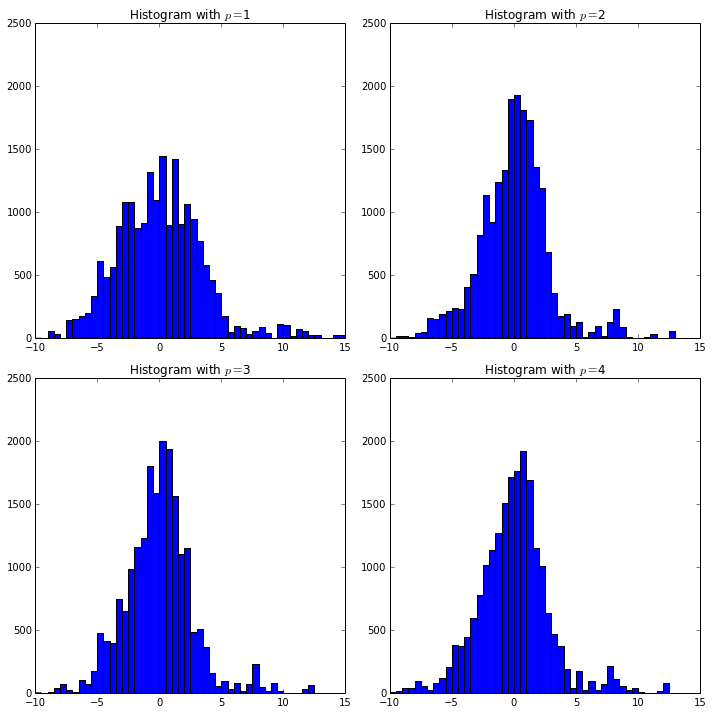

In [6]:
%matplotlib inline
plt.figure(1, figsize=(10, 10))
for i in range(4):
    plt.subplot(220+i+1)
    n, bins, patches = plt.hist(np.reshape(diffs[i], 20*1000), bins=50, range=(-10, 15))
    plt.title('Histogram with $p = $' + str(i+1))
    plt.ylim(ymax=2500)
plt.tight_layout()
plt.show()

## Calculate log likelihood

In [19]:
def log_like(arr):
    mean, std = np.mean(arr), np.std(arr)
    result = 0
    for num in arr:
        result += norm.logpdf(num, loc=mean, scale=std)
    return result

for item in diffs:
    print log_like(np.reshape(item, 20*1000))

-53292.1185271
-49240.2680536
-48466.7455654
-49428.5843529
